In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2h,50m
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,7h,25m
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,19h,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5h,25m
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,4h,45m


In [4]:
import pandas_profiling

In [7]:
# EDA

In [5]:
df.profile_report()

In [4]:
# we have found that there are some duplicate values
# source and destination have high correlation
# missing values are there

In [103]:
df.Duration_minute.fillna('0m',inplace=True)

In [104]:
df.Duration_hour=df.Duration_hour.apply(lambda x: x.split('h')[0])
df.Duration_minute=df.Duration_minute.apply(lambda x: x.split('m')[0])

In [105]:
df.Duration_hour=df.Duration_hour.astype(int)
df.Duration_minute=df.Duration_minute.astype(int)

In [106]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [107]:
df['total_journey_minute']=df.Duration_hour*60+df.Duration_minute

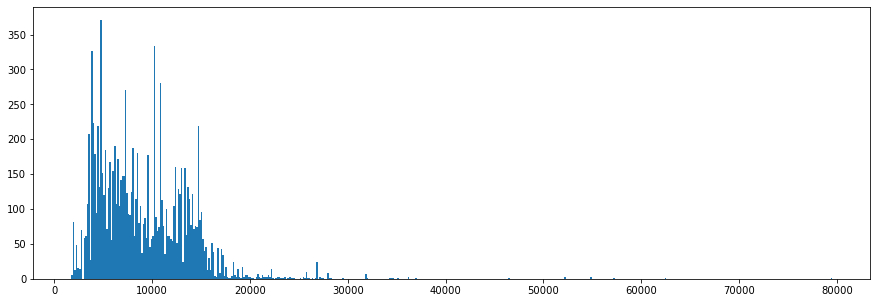

In [6]:
plt.figure(figsize=(15,5))
plt.hist(df.Price,bins=500)
plt.show()

In [17]:
# there is a huge right skiw in the price
# most of the fight price is within Rs. 20000

In [7]:
df.groupby('Airline').size()

Airline
Air Asia                              319
Air India                            1694
GoAir                                 194
IndiGo                               2043
Jet Airways                          3700
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              815
Trujet                                  1
Vistara                               478
Vistara Premium economy                 3
dtype: int64

In [108]:
# there are some airline companies have multiple names. so I clubed them.
df['Airline']=df['Airline'].replace({'Jet Airways Business':'Jet Airways','Multiple carriers Premium economy':'Multiple carriers','Vistara Premium economy':'Vistara'})

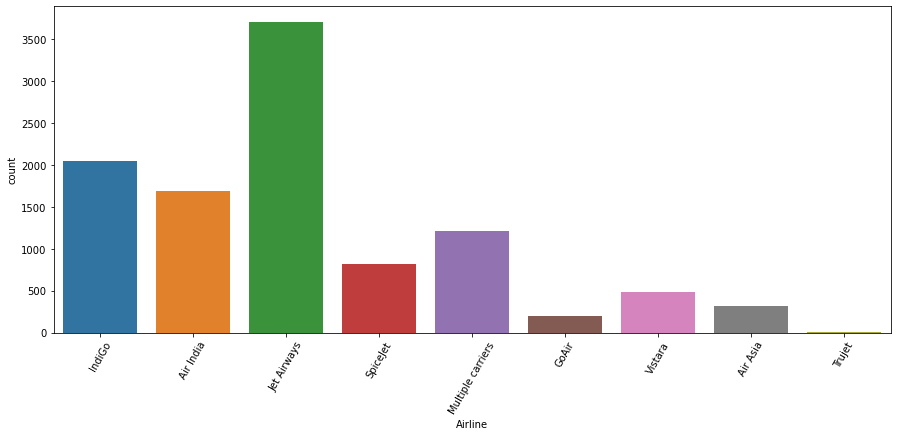

In [9]:
plt.figure(figsize=(15,6))
a=sns.countplot(df['Airline'])
a.set_xticklabels(df['Airline'].unique(),rotation=60)
plt.show()

In [31]:
# most of the flights are from Jet Airways, then Indigo and Air India

In [10]:
df.groupby('Airline').describe()

Price                                              \
                    count          mean          std     min      25%   
Airline                                                                 
Air Asia            319.0   5590.260188  2027.362290  3383.0  4282.00   
Air India          1694.0   9556.608028  3937.875634  2050.0  6597.75   
GoAir               194.0   5861.056701  2703.585767  3398.0  3898.00   
IndiGo             2043.0   5668.469897  2266.933697  2227.0  4226.00   
Jet Airways        3706.0  11674.724771  4723.735090  1840.0  8586.00   
Multiple carriers  1209.0  10908.228288  3705.495258  5797.0  7740.00   
SpiceJet            815.0   4335.841718  1851.144678  1759.0  3573.00   
Trujet                1.0   4140.000000          NaN  4140.0  4140.00   
Vistara             481.0   7808.596674  2913.687730  3687.0  5403.00   

                                               
                       50%       75%      max  
Airline                                        
Air Asia            5162.0   6451.00  13774.0  
Air India           9316.0  12199.00  31945.0  
GoAir               5135.0   6811.25  22794.0  
IndiGo              5000.0   6493.00  22153.0  
Jet Airways        11150.0  14151.00  79512.0  
Multiple carriers  10197.0  13587.00  36983.0  
SpiceJet            3873.0   4760.00  23267.0  
Trujet              4140.0   4140.00   4140.0  
Vistara             7980.0   9345.00  21730.0

In [38]:
# we find a nice summary
# highest price is from jet airways
# lowest from spicejet

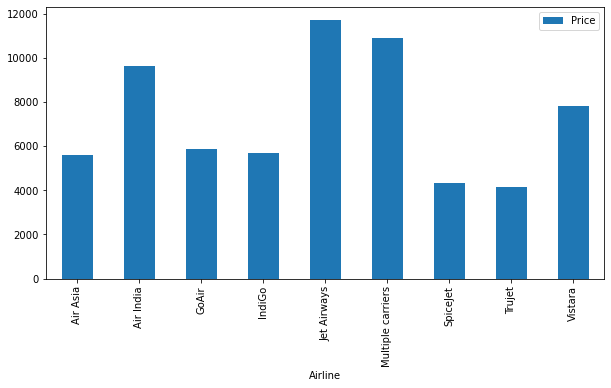

In [37]:
df.groupby('Airline').mean().plot(kind='bar',figsize=(10,5))

In [11]:
# Jet Airways and Multiple carriers have average tickit price is high
# Spicejet and Trujet have lowest

In [109]:
df.Date_of_Journey=pd.to_datetime(df.Date_of_Journey)

In [110]:
df['Date']=df.Date_of_Journey.dt.day

In [111]:
df['Month']=df.Date_of_Journey.dt.month

In [112]:
df['Day']=df.Date_of_Journey.dt.dayofweek

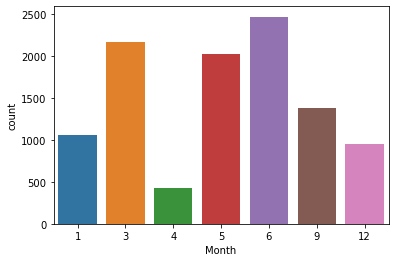

In [27]:
sns.countplot(df.Month)

In [28]:
# in the month of June, Macrh and May most ofthe flights are taken.

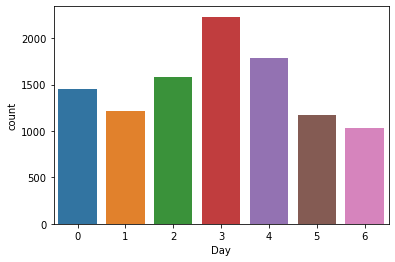

In [33]:
sns.countplot(df.Day)

In [35]:
# 0= Monday to 6= Sunday.
# so in thrusday most of the flights are taken.

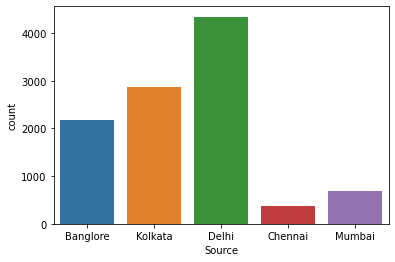

In [39]:
sns.countplot(df.Source)

In [40]:
# From Delhi and Kolkata moajority of planes have depurtured.

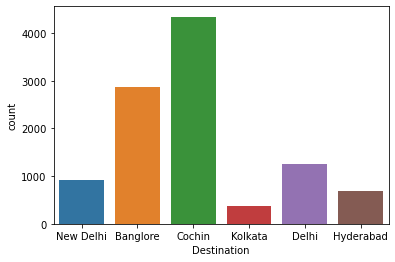

In [37]:
sns.countplot(df.Destination)

In [42]:
# Most people went to Cochin and Banglore cities

In [113]:
df['Hour']=df.Dep_Time.str[:2]

In [114]:
df.Hour=df.Hour.astype(int)

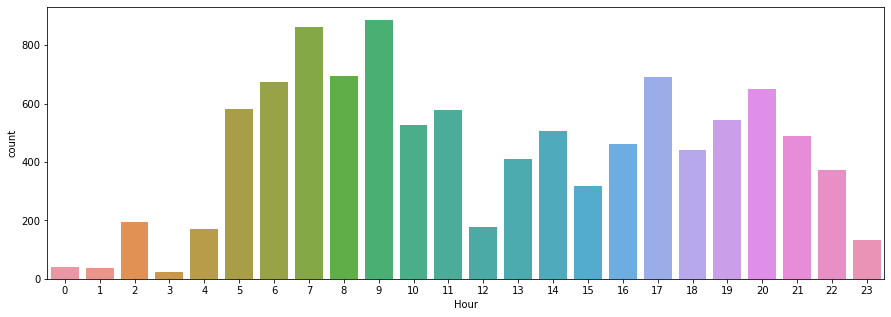

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df.Hour)

In [115]:
# creating bins according to flight counting in 24 hours of format
bins=[0,4,11,15,23]
hours=['mid night','morning','noon','evening']
df['hour_status']=pd.cut(df.Hour,bins=bins,labels=hours)

In [54]:
# we can find in a day the trend of flight tickits booking hikes twice. start incresing from 05:00 hours till 11:00 and again from 16:00 to 22:00 hours.

In [116]:
# creating new column where we put only from and to cities 
source=[]
destination=[]
for i in df.Route:
    d=i.split('→')[0]
    e=i.split('→')[-1]
    source.append(d+e)

In [117]:
df['from_to']=source

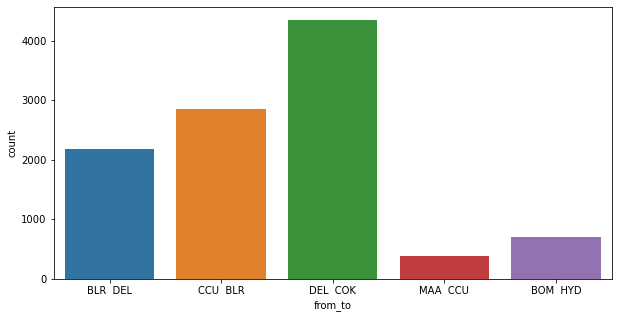

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df.from_to)

In [85]:
# important insights we got about from and to cities.
# most people travelled from Delhi to Cochin and Kolkata to Bangalore.

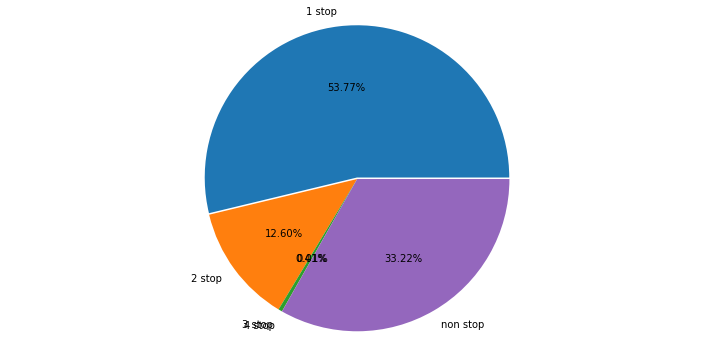

In [110]:
plt.figure(figsize=(10,5))
labels=['1 stop','2 stop','3 stop','4 stop','non stop']
plt.pie(df.groupby('Total_Stops').size(),labels=labels,explode=(0.01,0,0,0,0),autopct='%0.2f%%',radius=1)
plt.tight_layout()
plt.axis('equal')
plt.show()

In [111]:
# approx 54% flights were 1 stop and 33% are non stop

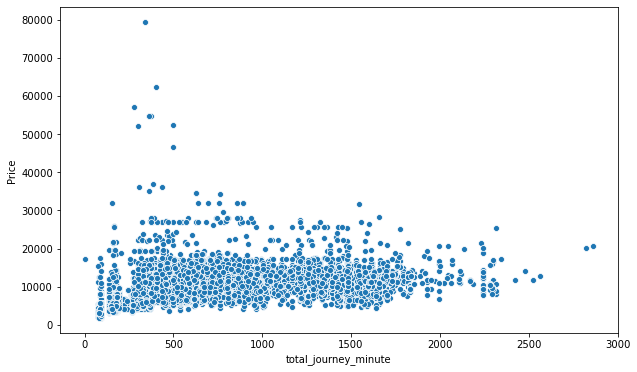

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.total_journey_minute,df.Price)

In [84]:
# flight fare has a strong correlation with flight price.

In [118]:
df.corr()

,Price,Duration_hour,Duration_minute,total_journey_minute,Date,Month,Day,Hour
Price,1.000000,0.504200,-0.131664,0.501758,-0.171142,0.008662,-0.005112,0.005155
Duration_hour,0.504200,1.000000,-0.133999,0.999442,-0.046812,0.056828,0.021973,-0.000648
Duration_minute,-0.131664,-0.133999,1.000000,-0.100819,-0.007709,-0.021506,0.032572,-0.018843
total_journey_minute,0.501758,0.999442,-0.100819,1.000000,-0.047257,0.056328,0.023158,-0.001285
Date,-0.171142,-0.046812,-0.007709,-0.047257,1.000000,-0.265200,-0.091499,-0.007617
Month,0.008662,0.056828,-0.021506,0.056328,-0.265200,1.000000,-0.167740,0.028462
Day,-0.005112,0.021973,0.032572,0.023158,-0.091499,-0.167740,1.000000,0.005267
Hour,0.005155,-0.000648,-0.018843,-0.001285,-0.007617,0.028462,0.005267,1.000000


In [84]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Total_Stops              0
Additional_Info          0
Price                    0
Duration_hour            0
Duration_minute          0
total_journey_minute     0
Date                     0
Month                    0
Day                      0
Hour                     0
hour_status             40
from_to                  0
dtype: int64

In [119]:
df.hour_status.fillna(df.hour_status.mode()[0],inplace=True)

In [97]:
# model creation

In [96]:
# removing unnecessary attributes

In [121]:
df.drop(['Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration_hour','Duration_minute','Additional_Info','Hour'],axis=1,inplace=True)

In [122]:
df.head()

,Airline,Total_Stops,Price,total_journey_minute,Date,Month,Day,hour_status,from_to
0,IndiGo,non-stop,3897,170,24,3,6,evening,BLR DEL
1,Air India,2 stops,7662,445,5,1,5,morning,CCU BLR
2,Jet Airways,2 stops,13882,1140,6,9,4,morning,DEL COK
3,IndiGo,1 stop,6218,325,5,12,3,evening,CCU BLR
4,IndiGo,1 stop,13302,285,3,1,3,evening,BLR DEL


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0
total_journey_minute,10462.0,629.781591,500.699045,5.0,170.0,505.0,910.00,2860.0
Date,10462.0,12.630090,8.791635,3.0,5.0,6.0,21.00,27.0
Month,10462.0,5.534601,2.995344,1.0,3.0,5.0,6.00,12.0
Day,10462.0,2.890652,1.833029,0.0,1.0,3.0,4.00,6.0


In [149]:
x=df.drop('Price',axis=1)
y=df['Price']

In [151]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

In [152]:
columntranform=ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=columntranform.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1,0,0,0,0,0,non-stop,170,24,3,6,evening,BLR DEL
1,0,1,0,0,0,0,0,0,0,2 stops,445,5,1,5,morning,CCU BLR
2,0,0,0,0,1,0,0,0,0,2 stops,1140,6,9,4,morning,DEL COK
3,0,0,0,1,0,0,0,0,0,1 stop,325,5,12,3,evening,CCU BLR
4,0,0,0,1,0,0,0,0,0,1 stop,285,3,1,3,evening,BLR DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,1,0,0,0,0,0,0,0,0,non-stop,150,4,9,2,evening,CCU BLR
10458,0,1,0,0,0,0,0,0,0,non-stop,155,27,4,5,evening,CCU BLR
10459,0,0,0,0,1,0,0,0,0,non-stop,180,27,4,5,morning,BLR DEL
10460,0,0,0,0,0,0,0,0,1,non-stop,160,3,1,3,morning,BLR DEL


In [153]:
columntranform=ColumnTransformer([('encoder',OneHotEncoder(),[9])],remainder='passthrough')
x=columntranform.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,170,24,3,6,evening,BLR DEL
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,445,5,1,5,morning,CCU BLR
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1140,6,9,4,morning,DEL COK
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,325,5,12,3,evening,CCU BLR
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,285,3,1,3,evening,BLR DEL


In [154]:
columntranform=ColumnTransformer([('encoder',OneHotEncoder(),[18])],remainder='passthrough')
x=columntranform.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,170,24,3,6,BLR DEL
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,445,5,1,5,CCU BLR
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1140,6,9,4,DEL COK
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,325,5,12,3,CCU BLR
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,285,3,1,3,BLR DEL


In [155]:
columntranform=ColumnTransformer([('encoder',OneHotEncoder(),[22])],remainder='passthrough')
x=columntranform.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,170,24,3,6
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,445,5,1,5
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1140,6,9,4
3,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,325,5,12,3
4,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,285,3,1,3


In [93]:
import statsmodels.api as sm 

In [156]:
# creating the summary just for checking the R squared and adjusted R sqaured.
x=x.astype(int)
X = sm.add_constant(x)
model= sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     560.5
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:54:20   Log-Likelihood:                -98928.
No. Observations:               10462   AIC:                         1.979e+05
Df Residuals:                   10438   BIC:                         1.981e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7095.9728    414.713     17.111      0.000    6283.056    7908.889
x1          2317.5122    107.244     21.610      0.000    2107.294    2527.731
x2           395.9640    134.458      2.945      0.003     132.401     659.527
x3          1149.3589    109.956     10.453      0.000     933.824    1364.894
x4          1066.4870    112.938      9.443      0.000     845.107    1287.867
x5          2166.6506    164.230     13.193      0.000    1844.729    2488.573
x6          1854.6827    118.547     15.645      0.000    1622.309    2087.057
x7          1713.9819    161.800     10.593      0.000    1396.822    2031.142
x8          1664.1259    115.541     14.403      0.000    1437.644    1890.608
x9          1863.1822    126.723     14.703      0.000    1614.780    2111.584
x10         -105.4654    560.371     -0.188      0.851   -1203.900     992.970
x11         2377.9496    563.750      4.218      0.000    1272.892    3483.007
x12         3472.7250    677.566      5.125      0.000    2144.565    4800.885
x13         5872.6564   2552.030      2.301      0.021     870.189    1.09e+04
x14        -4521.8928    566.437     -7.983      0.000   -5632.218   -3411.568
x15           21.1121    364.199      0.058      0.954    -692.787     735.011
x16         1678.2696    336.810      4.983      0.000    1018.057    2338.482
x17         -321.3422    384.144     -0.837      0.403   -1074.337     431.653
x18          254.4763    334.000      0.762      0.446    -400.227     909.180
x19         4195.7686    332.037     12.636      0.000    3544.913    4846.625
x20         3311.8671    341.027      9.711      0.000    2643.389    3980.345
x21          -67.7237    343.981     -0.197      0.844    -741.991     606.544
x22        -3983.0544   2779.542     -1.433      0.152   -9431.488    1465.379
x23         2006.5994    353.013      5.684      0.000    1314.627    2698.572
x24           -0.1637      0.097     -1.693      0.090      -0.353       0.026
x25          -85.5237      3.665    -23.334      0.000     -92.708     -78.339
x26         -139.6860     10.796    -12.939      0.000    -160.847    -118.525
x27          -85.5394     17.182     -4.979      0.000    -119.219     -51.860
==============================================================================
Omnibus:                     8992.412   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           925672.663
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      48.512   Cond. No.                     2.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-25. This might indicate

In [142]:
# R sqaured is 0.553 that means our model explains 55% of the data. so data given data is not sufficient to predict the price.

In [157]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [158]:
from sklearn.decomposition import PCA
pca=PCA()

In [159]:
principle_component=pca.fit_transform(x)

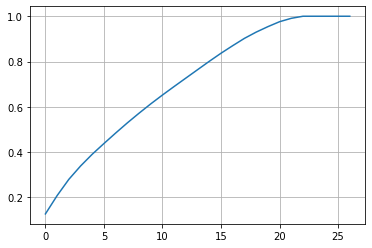

In [160]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [161]:
# we are taking 21 priciple components
pca=PCA(n_components=21)
x=pca.fit_transform(x)

In [162]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [163]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [43]:
forest=RandomForestRegressor(n_estimators=100)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
import math

In [45]:
math.sqrt(mean_squared_error(pred,y_test))

2680.854474499778

In [46]:
r2_score(y_test,pred)

0.6789753911030827

In [48]:
bagging=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=7))
bagging.fit(x_train,y_train)
pred=bagging.predict(x_test)
print(math.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(y_test,pred))

2618.5072464443015
0.6937335628499541


In [53]:
bagging=BaggingRegressor(base_estimator=RandomForestRegressor())
bagging.fit(x_train,y_train)
pred=bagging.predict(x_test)
print(math.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(y_test,pred))

2555.951567502143
0.7081920722838677


In [65]:
xgb=XGBRegressor(learning_rate=0.1)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print(math.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(y_test,pred))

2504.3761102899525
0.7198497910198363


In [164]:
# XGB is giving better prediction comparing with other methods based on RMSE and R2 score.